#### This creates one csv file for all the 2D stacks with the contour properties PER rock sample

### Import all libraries

In [2]:
from __future__ import print_function
import os
import collections
import numpy as np
import six
import sys
import logging as logger
import time
import json
import os
import logging.config
import pandas as pd
import gc
import math
import cv2
import matplotlib.pyplot as plt
import SimpleITK as sitk
import scipy.io as sio
import openpyxl
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
from bokeh.palettes import PuBu
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, ranges, LabelSet
from bokeh.plotting import figure
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

### Import data or contour properties for all the bentheimer sandstone

In [3]:
def contour_properties(contours, num_contours, slices, rock_type, d_img):
    
    "Function used to create a DataFrame that stores all the properties of a Contour"
    cont_dic = {}
    cont_df = pd.DataFrame()
    for num_cnt in range(0, num_contours):
        
        cnt = contours[num_cnt]
        #print(num_cnt, cnt)
        cont_dic['Contour Number'] = num_cnt
        cont_dic['Slice Number'] = slices
        cont_dic['Rock Type'] = rock_type
        cont_dic['Direction'] = d_img
                
        # Area and Perimeter
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        cont_dic['Contour Area'] = area
        cont_dic['Contour Perimeter'] = perimeter
        
        #Straight bounding rectangle: Aspect Ratio and Extent
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio_rect = float(w)/h
        cont_dic['Aspect Ratio Rectangle'] = aspect_ratio_rect
        rect_area = w*h
        extent = float(area)/rect_area
        cont_dic['Extent Rectangle'] = extent
        
        #Rotated Bounding Rectangle
        rect = cv2.minAreaRect(cnt)
        angle_rbr = rect[2]
        cont_dic['Rotated Rectangle Angle'] = angle_rbr
        
        #Bounding Ellipse
        #print('The length of the contour for slice', slices-1, 'and contour', num_cnt, 'is:', len(cnt))
        if len(cnt) >= 5:
            (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
            aspect_ratio_ellipse = float(MA)/ma
            angle_ellipse = angle
            cont_dic['Aspect Ratio Ellipse'] = aspect_ratio_ellipse
            cont_dic['Angle Ellipse'] = angle_ellipse
        else:
            #print(num_cnt)
            cont_dic['Aspect Ratio Ellipse'] = -100
            cont_dic['Angle Ellipse'] = -100
            
        cont_dic['Contour Points'] = cnt   
        
        # Image moments
        M = cv2.moments(cnt)
        
        # Hu Moments
        H = cv2.HuMoments(M)
        H_dict = {'Hu1':H[0][0], 'Hu2':H[1][0], 'Hu3':H[2][0], 'Hu4':H[3][0], 'Hu5':H[4][0], 'Hu6':H[5][0], 'Hu7':H[6][0]}
        
        # Adding elements from dict2 to dict1
        cont_dic.update(M)
        cont_dic.update(H_dict)
        cont_df = cont_df.append(cont_dic, ignore_index=True)
        
    return cont_df        

Starting the automation loop for fracture identification - Artificial Fractures
The data type for b_matfile is: <class 'dict'>
The data type for ben is: <class 'numpy.ndarray'>
The size of bentheimer sandstone image is: (300, 300, 300)
The unique values in ben is: [0 1]
1 represents Pores and 0 represents Grains
Image Number and Direction: 1 z
Extracting first slice for display: ben [0:300][0:300][0]
The number of contours identified in the image: 168
The number of contours identified in the image: 175
The number of contours identified in the image: 167
The number of contours identified in the image: 171
The number of contours identified in the image: 176
The number of contours identified in the image: 186
The number of contours identified in the image: 189
The number of contours identified in the image: 175
The number of contours identified in the image: 176
The number of contours identified in the image: 170
The number of contours identified in the image: 172
The number of contours i

The number of contours identified in the image: 172
The number of contours identified in the image: 175
The number of contours identified in the image: 172
The number of contours identified in the image: 171
The number of contours identified in the image: 172
The number of contours identified in the image: 164
The number of contours identified in the image: 166
The number of contours identified in the image: 154
The number of contours identified in the image: 162
The number of contours identified in the image: 173
The number of contours identified in the image: 164
The number of contours identified in the image: 163
The number of contours identified in the image: 151
The number of contours identified in the image: 159
The number of contours identified in the image: 163
The number of contours identified in the image: 146
The number of contours identified in the image: 154
The number of contours identified in the image: 157
The number of contours identified in the image: 168
The number o

The number of contours identified in the image: 195
The number of contours identified in the image: 185
The number of contours identified in the image: 188
The number of contours identified in the image: 179
The number of contours identified in the image: 170
The number of contours identified in the image: 183
The number of contours identified in the image: 181
The number of contours identified in the image: 180
The number of contours identified in the image: 191
The number of contours identified in the image: 190
The number of contours identified in the image: 179
The number of contours identified in the image: 177
The number of contours identified in the image: 168
The number of contours identified in the image: 163
The number of contours identified in the image: 165
The number of contours identified in the image: 174
The number of contours identified in the image: 183
The number of contours identified in the image: 190
The number of contours identified in the image: 174
The number o

The number of contours identified in the image: 169
The number of contours identified in the image: 184
The number of contours identified in the image: 182
The number of contours identified in the image: 181
The number of contours identified in the image: 175
The number of contours identified in the image: 158
The number of contours identified in the image: 160
The number of contours identified in the image: 148
The number of contours identified in the image: 161
The number of contours identified in the image: 172
The number of contours identified in the image: 168
The number of contours identified in the image: 177
The number of contours identified in the image: 161
The number of contours identified in the image: 165
The number of contours identified in the image: 165
The number of contours identified in the image: 162
The number of contours identified in the image: 161
The number of contours identified in the image: 160
The number of contours identified in the image: 161
The number o

The number of contours identified in the image: 179
The number of contours identified in the image: 177
The number of contours identified in the image: 175
The number of contours identified in the image: 168
The number of contours identified in the image: 163
The number of contours identified in the image: 162
The number of contours identified in the image: 165
The number of contours identified in the image: 180
The number of contours identified in the image: 191
The number of contours identified in the image: 179
The number of contours identified in the image: 173
The number of contours identified in the image: 174
The number of contours identified in the image: 175
The number of contours identified in the image: 166
The number of contours identified in the image: 173
The number of contours identified in the image: 176
The number of contours identified in the image: 169
The number of contours identified in the image: 168
The number of contours identified in the image: 170
The number o

The number of contours identified in the image: 187
The number of contours identified in the image: 186
The number of contours identified in the image: 192
The number of contours identified in the image: 183
The number of contours identified in the image: 190
The number of contours identified in the image: 180
The number of contours identified in the image: 167
The number of contours identified in the image: 163
The number of contours identified in the image: 163
The number of contours identified in the image: 161
The number of contours identified in the image: 172
The number of contours identified in the image: 175
The number of contours identified in the image: 178
The number of contours identified in the image: 180
The number of contours identified in the image: 175
The number of contours identified in the image: 174
The number of contours identified in the image: 161
The number of contours identified in the image: 165
The number of contours identified in the image: 159
The number o

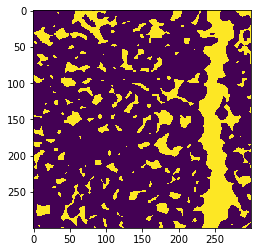

In [4]:
%%time
print("Starting the automation loop for fracture identification - Artificial Fractures")

num_im = [1, 2, 3]
direction_im = ['z']
cont_df_full = pd.DataFrame()

for num_img in num_im:
    
    for d_img in direction_im:
        matfile_name = 'D:\\Fracture Identification\\version_3\\Priliminary Samples\\Python_Mat_files\\ben{}_{}.mat'.format(num_img, d_img)
        b_matfile = sio.loadmat(matfile_name)
        print('The data type for b_matfile is:', type(b_matfile))
        ben = b_matfile['FinalImage']
        print('The data type for ben is:', type(ben))
        print('The size of bentheimer sandstone image is:', ben.shape)
        print('The unique values in ben is:', np.unique(ben))
        print('1 represents Pores and 0 represents Grains')
        print('Image Number and Direction:', num_img, d_img)

        print("Extracting first slice for display: ben [0:300][0:300][0]")
        ben_slice = ben[0:300, 0:300, 0]
        plt.imshow(ben_slice)
        
        rock_type = 'Ben_{}'.format(num_img)

        for slices in range(0, 300):

            ben_slice = ben[0:300, 0:300, slices] #extract a 2D slice for investigation
            contours, hierarchy = cv2.findContours(ben_slice, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            num_contours = len(contours)
            print('The number of contours identified in the image:', num_contours) 
            cont_df_slice = contour_properties(contours, num_contours, slices+1, rock_type, d_img)

            cont_df_full = cont_df_full.append(cont_df_slice, ignore_index = True)
        print('Contours extracted for:', rock_type, 'and direction:', d_img)
    
    cont_df_full = cont_df_full[['Rock Type','Direction','Slice Number','Contour Number', 'Contour Perimeter', 'Contour Area', 'Angle Ellipse', 'Aspect Ratio Ellipse',
                          'Aspect Ratio Rectangle', 'Extent Rectangle','Rotated Rectangle Angle', 'm00', 'm01', 'm02', 
                          'm03', 'm10', 'm11', 'm12', 'm20', 'm21', 'm30', 'mu02', 'mu03', 'mu11', 'mu12', 'mu20', 
                          'mu21','mu30', 'nu02', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30', 'Contour Points']]

In [6]:
# Import all the data or contour properties relating to artificial fractures to one notebook
df_ben = pd.DataFrame() #We will use this dataframe for K-means so it will contain processed data
df_ben_complete = pd.DataFrame()#This will contain the original pre-processed data
df_ben_kmeans = pd.DataFrame()

df_ben = cont_df_full.copy()
df_ben_complete = cont_df_full.copy()

# Rename the coplumns to replace all the spaces with '_'
cols = df_ben.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, ' ')) else x)
df_ben.columns = cols

print('Data import is complete for', len(rock_type), 'artificially fractured rock samples.')

print('All the values in the columns are rounded to three decimal places.')
df_ben = df_ben.round(3)
df_ben_complete = df_ben_complete.round(3)

print('The imported properties dataframe looks like below:')

df_ben

Data import is complete for 5 artificially fractured rock samples.
All the values in the columns are rounded to three decimal places.
The imported properties dataframe looks like below:


,Rock_Type,Direction,Slice_Number,Contour_Number,Contour_Perimeter,Contour_Area,Angle_Ellipse,Aspect_Ratio_Ellipse,Aspect_Ratio_Rectangle,Extent_Rectangle,...,mu21,mu30,nu02,nu03,nu11,nu12,nu20,nu21,nu30,Contour_Points
0,Ben_1,z,1.0,0.0,30.828,11.0,88.476,0.104,5.000,0.244,...,6.182,-46.882,0.027,-0.002,-0.043,0.004,0.402,0.015,-0.117,"[[[144, 297]], [[143, 298]], [[142, 298]], [[1..."
1,Ben_1,z,1.0,1.0,11.899,5.5,47.146,0.219,1.000,0.220,...,1.265,-1.427,0.132,0.002,-0.125,-0.011,0.173,0.018,-0.020,"[[[252, 295]], [[251, 296]], [[250, 297]], [[2..."
2,Ben_1,z,1.0,2.0,12.243,9.5,17.898,0.681,0.800,0.475,...,1.121,-0.398,0.113,-0.007,-0.022,-0.001,0.064,0.004,-0.001,"[[[43, 295]], [[43, 296]], [[42, 297]], [[42, ..."
3,Ben_1,z,1.0,3.0,8.828,3.0,0.000,0.000,2.500,0.300,...,0.000,0.000,0.028,0.000,-0.028,0.000,0.278,0.000,0.000,"[[[263, 293]], [[262, 294]], [[263, 294]], [[2..."
4,Ben_1,z,1.0,4.0,9.414,4.5,13.008,0.583,0.750,0.375,...,-0.292,0.280,0.154,0.024,-0.037,-0.007,0.062,-0.007,0.007,"[[[278, 291]], [[278, 292]], [[278, 293]], [[2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152968,Ben_3,z,300.0,169.0,27.314,29.0,124.615,0.503,1.250,0.362,...,-52.153,-145.918,0.102,0.013,0.074,0.007,0.140,-0.012,-0.032,"[[[193, 0]], [[194, 1]], [[195, 1]], [[196, 2]..."
152969,Ben_3,z,300.0,170.0,44.385,58.5,84.888,0.400,2.571,0.464,...,470.021,-990.764,0.035,0.003,-0.016,0.000,0.354,0.018,-0.038,"[[[174, 0]], [[173, 1]], [[172, 1]], [[171, 2]..."
152970,Ben_3,z,300.0,171.0,23.071,10.5,95.663,0.273,3.667,0.318,...,18.925,103.918,0.025,0.002,0.012,0.002,0.672,0.053,0.291,"[[[132, 0]], [[132, 1]], [[133, 2]], [[134, 2]..."
152971,Ben_3,z,300.0,172.0,22.243,13.5,82.010,0.284,2.500,0.338,...,-6.320,99.928,0.046,0.008,-0.076,-0.013,0.400,-0.009,0.149,"[[[37, 0]], [[37, 1]], [[37, 2]], [[36, 3]], [..."


### Pre-procosseing of Contour Properties

The pre-procossing steps involve dealing with (1) NaN values, (2) Zero values (3) Standarization

The NaN values were mainly encountered in Angle Ellipse and Aspect Ratio Ellipse. This happened because the minimum number of countour points needed to fit an ellipse and hence, calculate angle or aspect ratio is 5. For some pores, the size of the contour is too small to fit an ellipse and angles were not calculated. Hence, angle or aspect ratios = NaN. 
NaN for the case of angle and aspect ratios of Ellipse is given by -100.

The zero values need to be removed or considered to be removed because it will effect the standardization.

The contour properties that are used for fracture identification:
1. Contour Perimeter
2. Aspect Ratio Ellipse
3. Aspect Ratio Rectangle
4. Extent Rectangle
5. Spatial Moments
6. Central Moments


### (1) NaN Removal

In [7]:
num_ini = df_ben.groupby('Rock_Type').size()
num_ini

Rock_Type
Ben_1    49644
Ben_2    51723
Ben_3    51606
dtype: int64

In [8]:
df_ben.drop(df_ben[df_ben.Angle_Ellipse == -100].index, inplace=True)
df_ben.describe()

,Slice_Number,Contour_Number,Contour_Perimeter,Contour_Area,Angle_Ellipse,Aspect_Ratio_Ellipse,Aspect_Ratio_Rectangle,Extent_Rectangle,Rotated_Rectangle_Angle,m00,...,mu20,mu21,mu30,nu02,nu03,nu11,nu12,nu20,nu21,nu30
count,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,133988.000000,...,1.339880e+05,1.339880e+05,1.339880e+05,133988.000000,133988.000000,133988.000000,133988.000000,133988.00000,133988.000000,133988.000000
mean,150.696286,85.260329,46.268517,121.339892,83.180007,0.493771,1.185508,0.351700,-40.686969,121.339892,...,2.314466e+04,-2.860216e+04,-4.057943e+04,0.153408,-0.000579,-0.002616,-0.000184,0.16600,0.000155,0.000013
std,86.788186,49.728802,114.305379,718.061947,53.724416,0.223609,0.630669,0.121852,31.953026,718.061947,...,2.899198e+05,7.732016e+06,7.828308e+06,0.165313,0.113459,0.105850,0.043642,0.16032,0.042774,0.093057
min,1.000000,0.000000,5.414000,0.000000,0.000000,0.000000,0.083000,0.000000,-90.000000,0.000000,...,0.000000e+00,-5.452559e+08,-4.862149e+08,0.000000,-17.503000,-3.771000,-3.243000,0.00000,-3.385000,-7.744000
25%,76.000000,42.000000,13.657000,8.000000,39.319750,0.363000,0.758000,0.266000,-66.038000,8.000000,...,7.041000e+00,-1.612825e+01,-1.804775e+01,0.070000,-0.006000,-0.043000,-0.007000,0.07900,-0.007000,-0.007000
50%,151.000000,85.000000,24.485000,24.000000,82.473500,0.505000,1.000000,0.350000,-45.000000,24.000000,...,7.024050e+01,0.000000e+00,0.000000e+00,0.107000,0.000000,0.000000,-0.000000,0.12200,0.000000,0.000000
75%,225.000000,127.000000,45.314000,67.500000,127.625250,0.647000,1.467000,0.438000,-9.462000,67.500000,...,6.513735e+02,1.841000e+01,1.968950e+01,0.173000,0.006000,0.038000,0.007000,0.19700,0.008000,0.008000
max,300.000000,207.000000,2413.797000,12765.000000,180.000000,1.000000,12.000000,0.812000,90.000000,12765.000000,...,1.487464e+07,5.621936e+08,7.986595e+08,10.083000,11.677000,2.718000,5.072000,7.09400,2.515000,6.574000


In [9]:
num_after_nan = df_ben.groupby('Rock_Type').size()
rock_type = ['Ben_1', 'Ben_2', 'Ben_3']

print('The number of NaN or -100 values that were removed:')

for num in range(0, len(rock_type)):
    print(rock_type[num], ':', num_ini[num] - num_after_nan[num])
    
print('Check if ther are any more NaNs or -100 values:')
if df_ben.Angle_Ellipse.unique()[0] == -100:
    print('Yes, there are more NaN values')
else:
    print('You are good: No NAN values')

The number of NaN or -100 values that were removed:
Ben_1 : 5945
Ben_2 : 6436
Ben_3 : 6604
Check if ther are any more NaNs or -100 values:
You are good: No NAN values


### (2) Zero Values

First let us check which columns have zero values. Then, look into what we can do about the zeros in the columns of contour properties that we need to use for further analysis.

In [10]:
df_ben = df_ben.drop(['Contour_Points'], axis=1)

In [11]:
num_zero_col_ini = list(df_ben.columns[(df_ben == 0).any()])

print('The number of columns that have zero values:', len(num_zero_col_ini))
print('The columns are:', num_zero_col_ini)

The number of columns that have zero values: 30
The columns are: ['Contour_Number', 'Contour_Area', 'Angle_Ellipse', 'Aspect_Ratio_Ellipse', 'Extent_Rectangle', 'Rotated_Rectangle_Angle', 'm00', 'm01', 'm02', 'm03', 'm10', 'm11', 'm12', 'm20', 'm21', 'm30', 'mu02', 'mu03', 'mu11', 'mu12', 'mu20', 'mu21', 'mu30', 'nu02', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30']


Out of all the columns above, the ones that will be used for futher analysis have already been highlighted in the main section description. 

Exclude: Contour Number, Contour Area, Angle_Ellipse, Rotated_Rectangle_Angle from the zero analysis.
Reasoning: 
- Contour Number doesn't rally give us anything
- Contour Area is the same as m00 which is already accounted for
- Angles obtained via both Ellipse and Rectangle provide no means of ditinguishing the contours

On visual inspection, I noticed that 'Extent', 'Aspect_Ratio_Ellipse', 'Spatial and Central moments' = 0 happens only when the contour is too small for properties to be calculated. In such a case, we can now remove all the rows or contours that have a zero for the above properties.

In [12]:
num_ini = df_ben.groupby('Rock_Type').size()
num_ini

Rock_Type
Ben_1    43699
Ben_2    45287
Ben_3    45002
dtype: int64

In [13]:
df_ben = df_ben.loc[(df_ben[['Aspect_Ratio_Ellipse', 'Extent_Rectangle', 'm00', 'm01', 'm02', 'm03', 'm10', 'm11', 'm12', 'm20', 'm21', 'm30', 'mu02', 'mu03', 'mu11', 'mu12', 'mu20', 'mu21', 'mu30']] != 0).all(axis=1)]
df_ben.describe()

,Slice_Number,Contour_Number,Contour_Perimeter,Contour_Area,Angle_Ellipse,Aspect_Ratio_Ellipse,Aspect_Ratio_Rectangle,Extent_Rectangle,Rotated_Rectangle_Angle,m00,...,mu20,mu21,mu30,nu02,nu03,nu11,nu12,nu20,nu21,nu30
count,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,...,1.172700e+05,1.172700e+05,1.172700e+05,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000,117270.000000
mean,150.535951,85.623143,51.555332,138.082698,88.719151,0.531049,1.157565,0.363377,-40.281714,138.082698,...,2.644346e+04,-3.267968e+04,-4.636444e+04,0.159398,-0.000669,-0.002721,-0.000218,0.170650,0.000195,0.000065
std,86.853139,49.572655,121.252183,766.074036,50.084406,0.179924,0.550900,0.116350,29.974354,766.074036,...,3.097564e+05,8.264794e+06,8.367713e+06,0.165712,0.119498,0.108782,0.045583,0.161154,0.044584,0.098121
min,1.000000,0.000000,5.414000,0.500000,0.000000,0.024000,0.115000,0.014000,-90.000000,0.500000,...,2.800000e-02,-5.452559e+08,-4.862149e+08,0.009000,-17.503000,-2.765000,-3.243000,0.010000,-3.385000,-7.744000
25%,76.000000,43.000000,16.728000,12.000000,47.443000,0.396000,0.778000,0.280000,-63.435000,12.000000,...,1.687000e+01,-3.308925e+01,-3.703350e+01,0.074000,-0.008000,-0.048000,-0.008000,0.082000,-0.008000,-0.009000
50%,151.000000,85.000000,28.142000,30.500000,87.008000,0.523000,1.000000,0.364000,-45.000000,30.500000,...,1.171890e+02,9.000000e-03,4.000000e-03,0.111000,-0.000000,-0.003000,0.000000,0.123000,0.000000,-0.000000
75%,225.000000,128.000000,50.142000,78.500000,130.379000,0.656000,1.400000,0.446000,-11.310000,78.500000,...,9.074123e+02,3.750375e+01,4.007175e+01,0.180000,0.007000,0.043000,0.008000,0.200000,0.008000,0.009000
max,300.000000,206.000000,2413.797000,12765.000000,179.997000,1.000000,7.333000,0.812000,0.000000,12765.000000,...,1.487464e+07,5.621936e+08,7.986595e+08,6.796000,11.677000,2.002000,5.072000,4.390000,2.515000,6.574000


In [14]:
num_after_zeros = df_ben.groupby('Rock_Type').size()

print('The number of zeros values that were removed:')

for num in range(0, len(rock_type)):
    print(rock_type[num], ':', num_ini[num] - num_after_zeros[num])   

The number of zeros values that were removed:
Ben_1 : 5527
Ben_2 : 5600
Ben_3 : 5591


### After Zero and NaN Removal

In [15]:
df_ben_kmeans = df_ben.copy()
df_ben

,Rock_Type,Direction,Slice_Number,Contour_Number,Contour_Perimeter,Contour_Area,Angle_Ellipse,Aspect_Ratio_Ellipse,Aspect_Ratio_Rectangle,Extent_Rectangle,...,mu20,mu21,mu30,nu02,nu03,nu11,nu12,nu20,nu21,nu30
0,Ben_1,z,1.0,0.0,30.828,11.0,88.476,0.104,5.000,0.244,...,48.672,6.182000e+00,-4.688200e+01,0.027,-0.002,-0.043,0.004,0.402,0.015,-0.117
1,Ben_1,z,1.0,1.0,11.899,5.5,47.146,0.219,1.000,0.220,...,5.245,1.265000e+00,-1.427000e+00,0.132,0.002,-0.125,-0.011,0.173,0.018,-0.020
2,Ben_1,z,1.0,2.0,12.243,9.5,17.898,0.681,0.800,0.475,...,5.773,1.121000e+00,-3.980000e-01,0.113,-0.007,-0.022,-0.001,0.064,0.004,-0.001
4,Ben_1,z,1.0,4.0,9.414,4.5,13.008,0.583,0.750,0.375,...,1.262,-2.920000e-01,2.800000e-01,0.154,0.024,-0.037,-0.007,0.062,-0.007,0.007
6,Ben_1,z,1.0,6.0,49.698,85.5,146.974,0.324,0.650,0.329,...,773.936,4.514010e+02,-2.212200e+01,0.219,0.025,0.121,0.016,0.106,0.007,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152967,Ben_3,z,300.0,168.0,1263.869,8109.5,0.239,0.300,0.323,0.279,...,2365212.013,-9.255239e+07,-2.978614e+07,0.941,0.122,-0.047,0.002,0.036,-0.016,-0.005
152968,Ben_3,z,300.0,169.0,27.314,29.0,124.615,0.503,1.250,0.362,...,117.948,-5.215300e+01,-1.459180e+02,0.102,0.013,0.074,0.007,0.140,-0.012,-0.032
152969,Ben_3,z,300.0,170.0,44.385,58.5,84.888,0.400,2.571,0.464,...,1212.379,4.700210e+02,-9.907640e+02,0.035,0.003,-0.016,0.000,0.354,0.018,-0.038
152970,Ben_3,z,300.0,171.0,23.071,10.5,95.663,0.273,3.667,0.318,...,74.097,1.892500e+01,1.039180e+02,0.025,0.002,0.012,0.002,0.672,0.053,0.291


### (3) Standardization

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [17]:
# Before PCA, remove columns that are mere descriptors
# Before PCA, remove columns that are mere descriptors
X_frac = np.array(df_ben.drop(['Contour_Number', 'Rock_Type', 'Direction', 'Slice_Number','Extent_Rectangle', 'Contour_Area','nu02', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30', 'Angle_Ellipse', 'Rotated_Rectangle_Angle'], 1).astype(float))
X_frac_df = df_ben.drop(['Contour_Number', 'Rock_Type', 'Slice_Number', 'Direction', 'Contour_Area','nu02', 'Extent_Rectangle', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30', 'Angle_Ellipse', 'Rotated_Rectangle_Angle'], 1)
X_frac_df.columns

Index(['Contour_Perimeter', 'Aspect_Ratio_Ellipse', 'Aspect_Ratio_Rectangle',
       'm00', 'm01', 'm02', 'm03', 'm10', 'm11', 'm12', 'm20', 'm21', 'm30',
       'mu02', 'mu03', 'mu11', 'mu12', 'mu20', 'mu21', 'mu30'],
      dtype='object')

### Complete PCA Analysis

In [18]:
#Applying PCA to artificial frac
X_std_frac = MinMaxScaler().fit_transform(X_frac) #Normalise everything between 0 to 1
pca_frac = PCA(n_components=14)
X_PC_frac = pca_frac.fit_transform(X_std_frac)

principalDf_frac = pd.DataFrame(data = X_PC_frac, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
rock_type_col = list(df_ben['Rock_Type'])
principalDf_frac["Rock_Type"] = rock_type_col

principalDf_frac

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Rock_Type
0,0.387140,-0.314044,0.476374,-0.002128,-0.000107,-0.004016,-0.001833,-0.000614,-0.000383,-0.000623,0.000113,-0.000090,-0.000008,-0.000144,Ben_1
1,0.255225,-0.186515,-0.059642,0.003556,-0.004807,-0.006378,-0.001526,0.000485,0.002392,0.001082,0.000484,-0.001379,0.000271,0.000598,Ben_1
2,-0.147715,0.062107,-0.034049,0.001288,-0.004023,-0.008463,-0.002930,0.000664,0.001619,0.000588,0.000374,-0.000823,0.000966,-0.000116,Ben_1
3,-0.063150,0.010631,-0.052190,0.003574,-0.004207,-0.008968,-0.002355,0.000749,0.001866,0.001023,0.000374,-0.001053,0.000036,0.000431,Ben_1
4,0.184275,-0.087778,-0.092022,0.012653,-0.014391,0.005564,0.002297,-0.009210,0.008781,0.000437,-0.001617,0.004923,-0.002952,0.000541,Ben_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117265,1.343468,1.734263,0.028555,0.444918,0.173994,-0.048752,-0.055062,-0.032298,0.081296,-0.028829,-0.047689,0.009100,0.021861,-0.011350,Ben_3
117266,0.011249,-0.038700,0.007408,0.002260,0.001239,-0.004494,-0.000663,0.001904,-0.000982,0.000610,0.000087,-0.000167,0.000166,-0.000070,Ben_3
117267,0.112698,-0.113084,0.177168,0.000284,0.005882,-0.000725,0.000600,0.002221,-0.003388,-0.000070,-0.000109,0.000367,-0.000173,-0.000274,Ben_3
117268,0.228234,-0.204467,0.312530,0.000125,0.000566,-0.006379,-0.001769,0.000853,-0.000751,0.000070,0.000328,-0.000867,-0.000219,0.000199,Ben_3


In [19]:
var_per = pca_frac.explained_variance_ratio_ * 100
var_per = [round(x, 2) for x in var_per]
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']

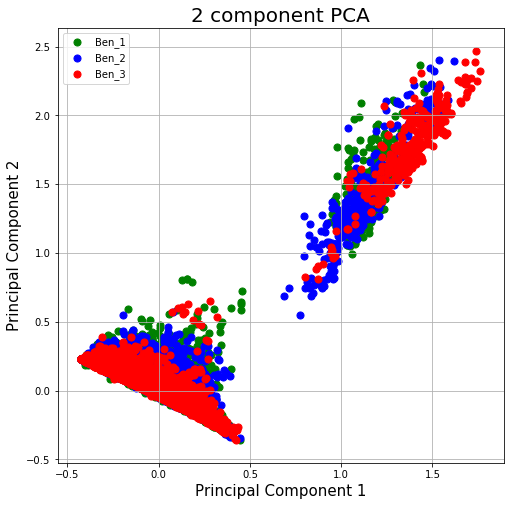

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA')
targets = ['Ben_1', 'Ben_2']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf_frac['Rock_Type'] == target
    ax.scatter(principalDf_frac.loc[indicesToKeep, 'PC1']
               , principalDf_frac.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)

In [24]:
#output_file("PCA_1.html")
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
p = figure(x_range=columns,  plot_width = 700, plot_height=300, title="PCA for Sandstone: Fractured Bentheimer Sandstone",
           toolbar_location=None, tools="", y_range= ranges.Range1d(start=0,end=100))

p.vbar(x=columns, top=var_per, width=0.9)
p.title.text_font_size = '16pt'

# change just some things about the x-axes
p.xaxis.axis_label = "Principal Components (PCs)"

# change just some things about the y-axes
p.yaxis.axis_label = "Variances (%) explained by each PC"

source = ColumnDataSource(dict(x=columns,y=var_per))
labels = LabelSet(x='x', y='y', text='y', level='glyph', source=source, x_offset = -18, y_offset = 0)
p.add_layout(labels)


show(p)

In [30]:
from bokeh.io import output_file, show, save
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, ColumnDataSource, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.transform import transform
from bokehheat import heat
from bokeh.io import show
from bokeh.palettes import Reds9, RdBu11, RdYlBu, Colorblind8, RdBu

x = heat.heatmap(df_matrix = df, ls_color_palette = RdBu11, r_low = -0.8, r_high = 0.8, s_z ="PCA for Sandstone: Fractured Bentheimer Sandstone")


show(x)
save(x)


'C:\\Users\\admin\\AppData\\Local\\Temp\\tmpoj1018gz.html'

### After PCA Components are chosen

In [55]:
pca_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
df_ben_pca = pd.DataFrame()
df_ben_pca = df_ben.copy()

for pca_num in range(2, 15):
    #Applying PCA to artificial frac
    X_frac = np.array(df_ben.drop(['Contour_Number', 'Rock_Type', 'Direction', 'Slice_Number','Extent_Rectangle', 'Contour_Area', 'Aspect_Ratio_Ellipse','nu02', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30', 'Angle_Ellipse', 'Rotated_Rectangle_Angle'], 1).astype(float))
    X_std_frac = StandardScaler().fit_transform(X_frac) #Normalise everything between 0 to 1
    pca_frac = PCA(n_components=pca_num)
    X_PC_frac = pca_frac.fit_transform(X_std_frac)

    km_frac_pca = KMeans(
        n_clusters=2, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km_frac_pca = km_frac_pca.fit_predict(X_PC_frac)
    
    col_name_label = 'Fracture_PCA{}'.format(pca_num)

    df_ben_pca[col_name_label] = y_km_frac_pca

#In the above, we have saved the labels obtained via k-means clustering in the processes dataframe. But we need to get the complete unfiltered dataset, and make all the removed contours = pores. So, lets try to merge.

# Rename the coplumns to replace all the spaces with '_'
cols = df_ben_complete.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, ' ')) else x)
df_ben_complete.columns = cols

print('Data import is complete for', len(rock_type), 'artificially fractured rock samples.')


#Merge the dataframes
df_merge = df_ben_complete.merge(df_ben_pca,  how='outer', left_index = True, right_index = True)


col_drop = ['Rock_Type_y', 'Direction_y', 'Slice_Number_y',
       'Contour_Number_y', 'Contour_Perimeter_y', 'Contour_Area_y',
       'Angle_Ellipse_y', 'Aspect_Ratio_Ellipse_y', 'Aspect_Ratio_Rectangle_y',
       'Extent_Rectangle_y', 'Rotated_Rectangle_Angle_y', 'm00_y', 'm01_y',
       'm02_y', 'm03_y', 'm10_y', 'm11_y', 'm12_y', 'm20_y', 'm21_y', 'm30_y',
       'mu02_y', 'mu03_y', 'mu11_y', 'mu12_y', 'mu20_y', 'mu21_y', 'mu30_y',
       'nu02_y', 'nu03_y', 'nu11_y', 'nu12_y', 'nu20_y', 'nu21_y', 'nu30_y']
df_merge.drop(col_drop, axis=1, inplace=True)

merge_cols = ['Rock_Type', 'Direction', 'Slice_Number', 'Contour_Number',
       'Contour_Perimeter', 'Contour_Area', 'Angle_Ellipse',
       'Aspect_Ratio_Ellipse', 'Aspect_Ratio_Rectangle',
       'Extent_Rectangle', 'Rotated_Rectangle_Angle', 'm00', 'm01',
       'm02', 'm03', 'm10', 'm11', 'm12', 'm20', 'm21', 'm30',
       'mu02', 'mu03', 'mu11', 'mu12', 'mu20', 'mu21', 'mu30',
       'nu02', 'nu03', 'nu11', 'nu12', 'nu20', 'nu21', 'nu30',
       'Contour_Points', 'Fracture_PCA2', 'Fracture_PCA3', 'Fracture_PCA4', 'Fracture_PCA5', 
             'Fracture_PCA6', 'Fracture_PCA7', 'Fracture_PCA8', 'Fracture_PCA9', 'Fracture_PCA10', 'Fracture_PCA11', 
             'Fracture_PCA12', 'Fracture_PCA13', 'Fracture_PCA14']
df_merge.columns = merge_cols

Data import is complete for 3 artificially fractured rock samples.


In [56]:
df_merge

,Rock_Type,Direction,Slice_Number,Contour_Number,Contour_Perimeter,Contour_Area,Angle_Ellipse,Aspect_Ratio_Ellipse,Aspect_Ratio_Rectangle,Extent_Rectangle,...,Fracture_PCA5,Fracture_PCA6,Fracture_PCA7,Fracture_PCA8,Fracture_PCA9,Fracture_PCA10,Fracture_PCA11,Fracture_PCA12,Fracture_PCA13,Fracture_PCA14
0,Ben_1,z,1.0,0.0,30.828,11.0,88.476,0.104,5.000,0.244,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Ben_1,z,1.0,1.0,11.899,5.5,47.146,0.219,1.000,0.220,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Ben_1,z,1.0,2.0,12.243,9.5,17.898,0.681,0.800,0.475,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Ben_1,z,1.0,3.0,8.828,3.0,0.000,0.000,2.500,0.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ben_1,z,1.0,4.0,9.414,4.5,13.008,0.583,0.750,0.375,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152968,Ben_3,z,300.0,169.0,27.314,29.0,124.615,0.503,1.250,0.362,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152969,Ben_3,z,300.0,170.0,44.385,58.5,84.888,0.400,2.571,0.464,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152970,Ben_3,z,300.0,171.0,23.071,10.5,95.663,0.273,3.667,0.318,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
152971,Ben_3,z,300.0,172.0,22.243,13.5,82.010,0.284,2.500,0.338,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
df_merge = df_merge.fillna(1)

num_frac = [1, 2, 3]
for num in num_frac:
    col_name = 'Ben_{}'.format(num)
    df_frac = df_merge.loc[df_merge['Rock_Type'] == col_name]
    csv_name = 'D:\\Fracture Identification\\version_3\\Properties_Excel\\kmeans_ben_acc{}.csv'.format(num)
    df_frac.to_csv(csv_name) 